# Tutorial 7: Events and holidays

There are two ways to add special events to NeuralProphet: custom events and predefined country holidays. Both can be used to model special occasions and events that are not captured by the other components. These special events can help to improve the model's performance and interpretability.

First we look into country holidays, later we will explore custom events.

/Users/leoniewagner/Documents/Uni/Stanford/dev_code/neural_prophet/.venv/lib/python3.9/site-packages/plotly_resampler/aggregation/aggregators.py:25: UserWarning: Could not import lttbc; will use a (slower) python alternative.
  warnings.warn("Could not import lttbc; will use a (slower) python alternative.")


Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

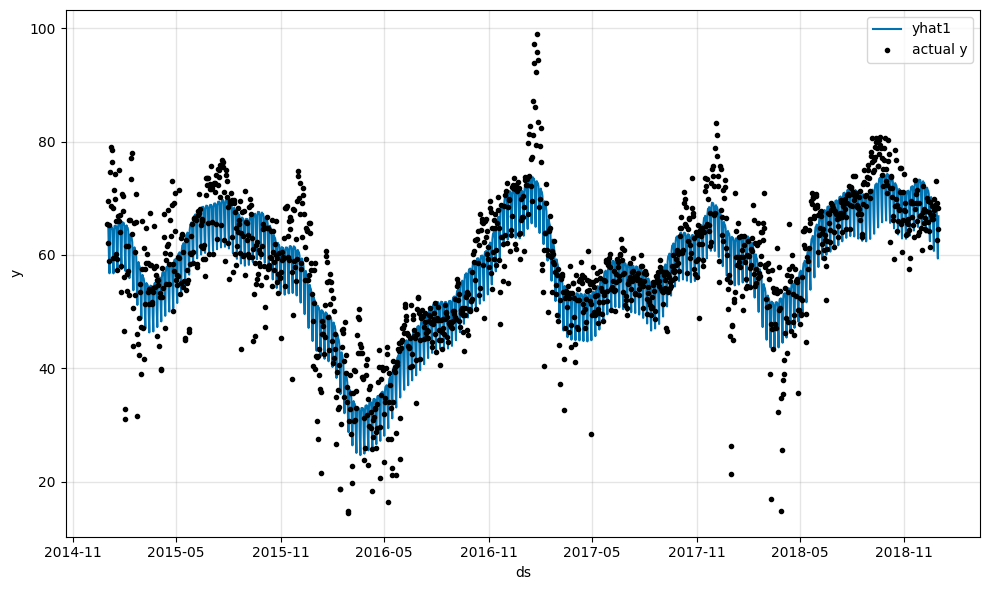

In [1]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

# Load the dataset for tutorial 4 with the extra temperature column
df = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/kaggle-energy/datasets/tutorial01.csv")
df.head()

# Disable logging messages unless there is an error
set_log_level("ERROR")

# Default model
m = NeuralProphet()
m.set_plotting_backend("matplotlib")  # Use matplotlib due to #1235

# Continue training the model and making a prediction
metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

NeuralProphet supports a wide range of countries and regions. The full list can be found in the [pyholidays documentation](https://python-holidays.readthedocs.io/en/latest/), which is internally used for country holiday support.

Country holidays can easily be added with the `add_country_holidays` function:

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

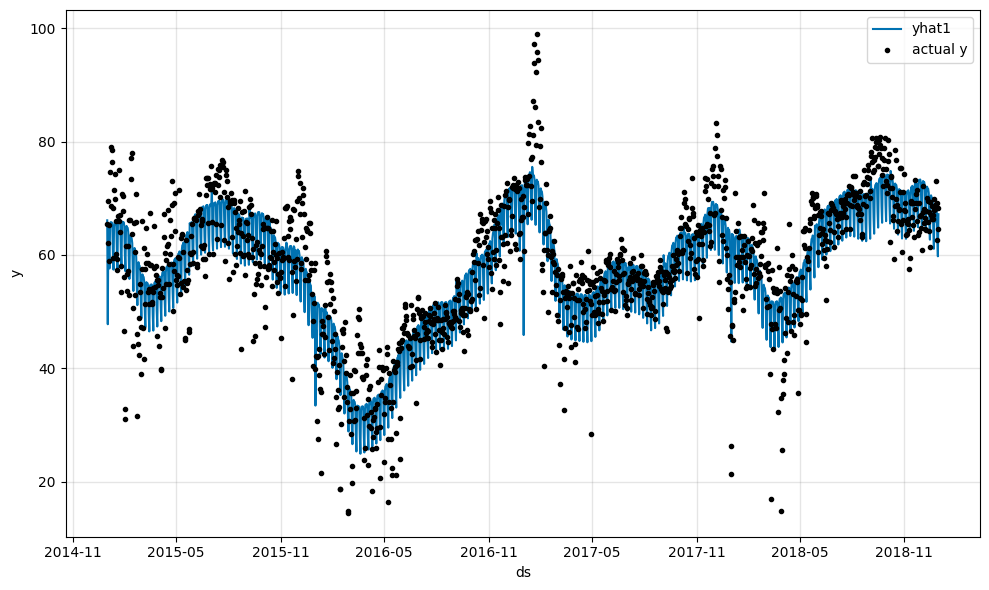

In [2]:
m = NeuralProphet()
m.set_plotting_backend("matplotlib")  # Use matplotlib due to #1235

m = m.add_country_holidays("US")

metrics = m.fit(df)
forecast = m.predict(df)
m.plot(forecast)

Effects from special events or holidays may occur sporadically. Such events are modelled analogous to future regressors, with each event $e$ as a binary variable $e ∈ [0, 1]$, signaling whether the event occurs on the particular day or not.

## Custom events

Custom events are very similar to country holidays, but can be used to model any special event. The only difference is that the event name and occasions with dates need to be specified by the user. Furthermore, the user has to either have the events included in the training data or prepare the dataset accordingly. We will explore the latter option in the following example to illustrate how the custom event dataset has to look like.

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 46it [00:00, ?it/s]

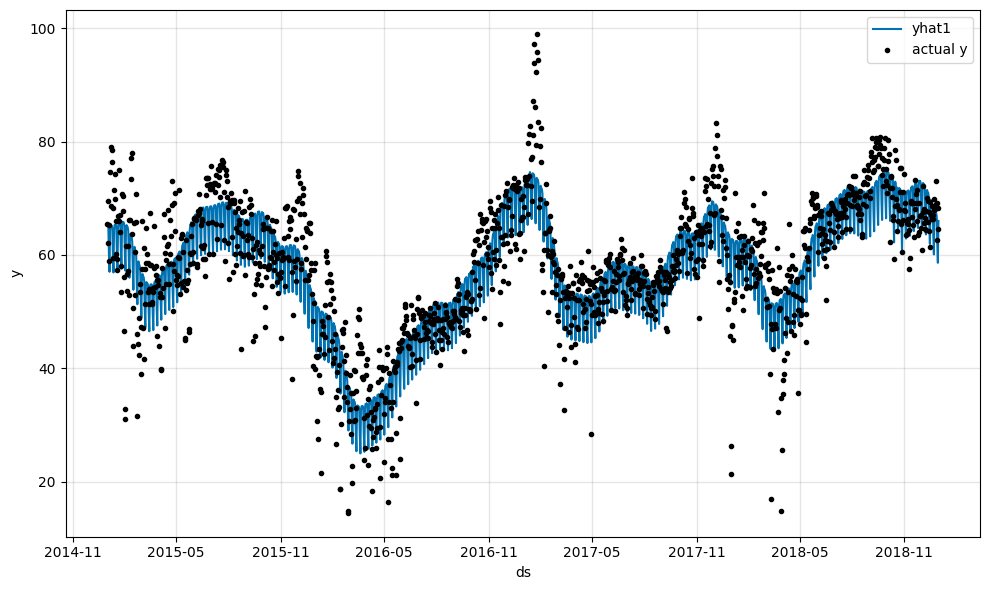

In [3]:
# https://eswd.eu/cgi-bin/eswd.cgi

df_events = pd.DataFrame(
    {
        "event": "extreme_weather",
        "ds": pd.to_datetime(
            [
                "2018-11-23",
                "2018-11-17",
                "2018-10-28",
                "2018-10-18",
                "2018-10-14",
            ]
        ),
    }
)

m = NeuralProphet()
m.set_plotting_backend("matplotlib")  # Use matplotlib due to #1235

m.add_events("extreme_weather")

df_all = m.create_df_with_events(df, df_events)

metrics = m.fit(df_all)
forecast = m.predict(df_all)
m.plot(forecast)

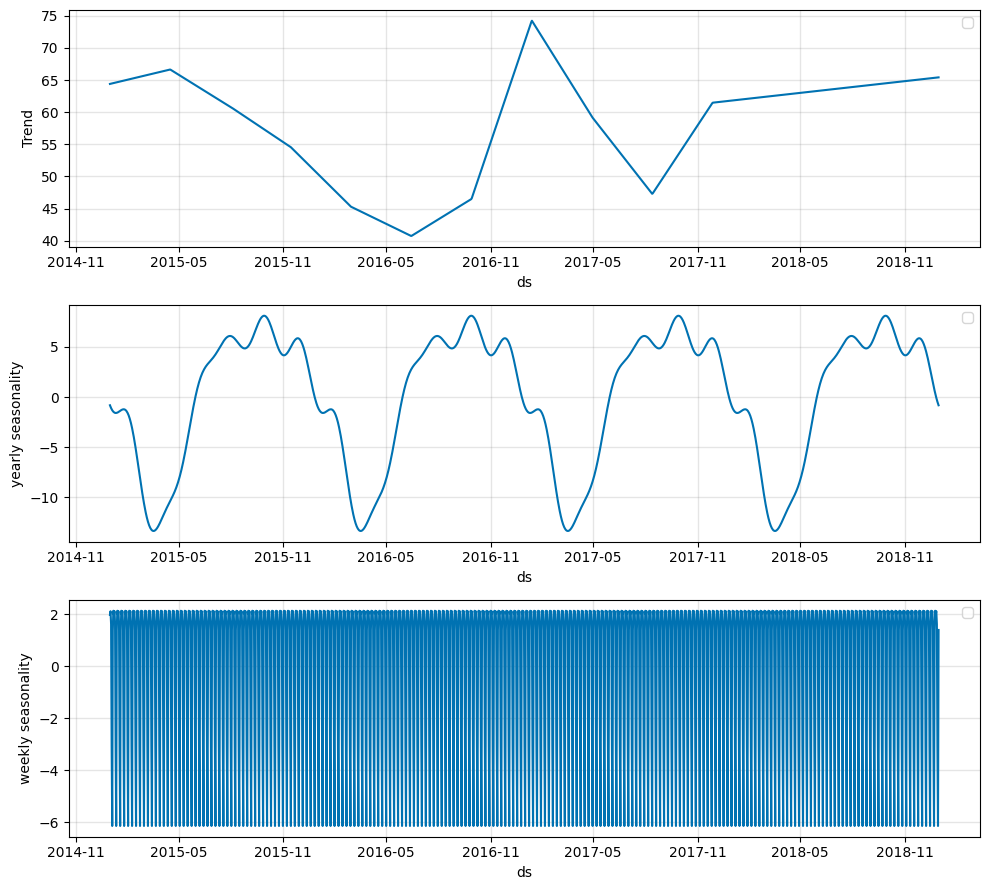

In [4]:
m.plot_components(forecast)

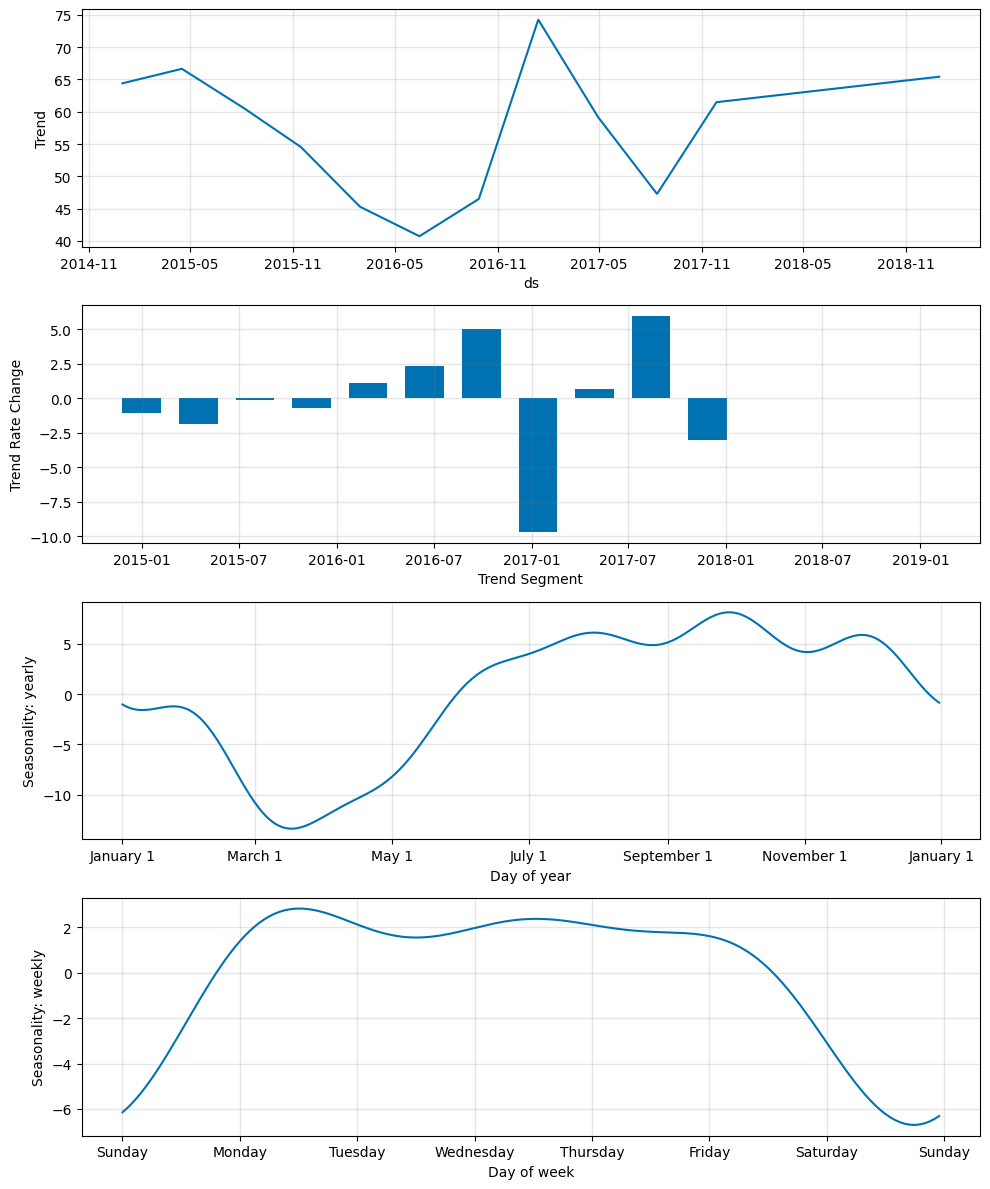

In [5]:
m.plot_parameters()